# What news "Zen" shows

On September 12, 2022, Yandex closed the deal to sell "Zen" and "News" services to VK company. Users are now redirected from yandex.ru to dzen.ru. On the main page of [Zen](https://dzen.ru/) there is a category "Highlights in the Media".

What news does VK choose to show on Zen?

The goal of the project is to analyze the main news of the Zen portal using web scraping and natural language processing tools.

Project progress:

- to collect links from the "Highlights in the Media" section,
- to parse news texts,
- to process texts,
- to visualize results,
- to conclude.

The text is in Russian, but in part 3 we will translate TOP-10 frequent words in English.

Libraries used: selenium, BeautifulSoup, requests, re, nltk, spacy, translators, wordcloud, matplotlib.

Keywords: web scraping, parsing, natural language processing, NLP, word cloud.


## Collecting data

We'll start with importing all the necessary libraries.

In [39]:
# Import libraries for web scraping.

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import requests

# Import libraries for natural language processing.

import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import translators as ts

# Import libraries for visualization.

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

With selenium library, we will open the main page of [Zen](https://dzen.ru/).

This library allows to simulate user actions. In this case, on the main page, we need to click on the "Show more" ("Показать ещё") button 2 times to load all the links in the "Highlights in the Media" category.


In [40]:
# Open a browser using selenium.

s = Service('chromedriver.exe')
browser = webdriver.Chrome(service = s)

# Pass the link to the site.

url = 'https://dzen.ru/'
browser.get(url)

# Double click on the "Show more" button to load all links.

browser.find_element(By.CLASS_NAME, 'card-news__moreButtonText-2W').click()
browser.find_element(By.CLASS_NAME, 'card-news__moreButtonText-2W').click()

With BeautifulSoup library, we will load the page data. We will find links on the page that lead to news, and collect them in the links list.

In [41]:
# Create "soup" from the page.

soup = BeautifulSoup(browser.page_source, 'lxml')

In [42]:
# Collect news from the category "Highlights in the Media".

news = soup.find_all('li', class_='news-story__story-2M')

In [43]:
# We collect links to the news.

links = []

for piece in news:
    link = piece.find('a').get('href')
    links.append(link)
    print(link)

https://dzen.ru/news/story/Gubernator_Kaluzhskoj_oblasti_SHapsha_podtverdil_vzryv_drona_navoennom_aehrodrome--c28d463b011e6f31ffb5da575c37b975?lang=ru&from=main_portal&fan=1&stid=6ie_Q_kEo7XhKhML3GJ6&t=1665139664&persistent_id=241361064&story=a751af7f-91e2-5410-af9a-04ee892b58c9&issue_tld=ru
https://dzen.ru/news/story/Pravitelstvo_FRG_zayavilo_chto_SHolc_vystupaet_protiv_ispolzovaniya_yadernogo_oruzhiya--032c160698ccf8bd07907285b1be1ee1?lang=ru&from=main_portal&fan=1&stid=HFQBw56B-UhoXLjrEfEH&t=1665139664&persistent_id=241361031&story=d3101a14-4de4-5bf1-8613-b5b2b5b9ace2&issue_tld=ru
https://dzen.ru/news/story/Putin_podpisal_zakon_okreditnykh_kanikulakh_dlyamobilizovannykh_i_uchastnikov_SVO_naUkraine--e628ed74e0ba280a7ee95dcc4805499c?lang=ru&from=main_portal&fan=1&stid=MLHc6-rIp6__MfdP84i0&t=1665139664&persistent_id=230239099&story=9d65cbf3-69b4-51a4-907d-e1677cb16caf&issue_tld=ru
https://dzen.ru/news/story/VRespublike_Altaj_pochastichnoj_mobilizacii_ne_prizvali_ni_odnogo_zhitelya--ef8

In [44]:
# Add headers to be able to search by tags on these pages.

headers = {
    'Cookie': 'sso_checked=1',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.79 Safari/537.36'
}

With requests library, we will access each link from the links list and collect the news texts.

In [45]:
# We collect news texts in the texts list.

texts = []

for link in links:
    page = requests.get(link, headers=headers)
    soup = BeautifulSoup(page.text, 'lxml')
    text = soup.find_all('span', class_='mg-story-summarization')
    for el in text:
        texts.append(el.text)

print(texts)

['Взрыв произошел на аэродроме под Калугой, упал беспилотник, пострадавших нет, ', ' в пятницу губернатор региона ', 'Владислав Шапша', '.', 'Инфраструктура аэродрома и техника не повреждены.', '«На месте работает следственно-оперативная группа для установления причин и обстоятельств случившегося», - сообщил Шапша.', 'Телеграм-канал Baza писал, что беспилотник взорвался над взлетно-посадочной полосой.', 'Канцлер Германии ', 'Олаф Шольц', ' выступает против применения ядерного оружия.', '«Канцлер четко выступает против использования ядерного оружия», — приводит слова Вольфганга Брюхнгера РИА «Новости».', 'Как сообщалось ранее, украинский лидер заявил, что НАТО должно нанести удары по РФ, чтобы "исключить возможность применения Россией ядерного оружия".', 'Позднее пресс-секретарь Зеленского Сергей Никифоров пояснил, что тот не призывал использовать ядерное оружие против РФ, а подразумевал превентивные санкции.', 'Президент России Владимир Путин подписал закон о предоставлении мобилизован

In [46]:
# Combine the news texts into one continuous text.

texts_new = ''

for text in texts:
    texts_new += ' ' + text

print(texts_new)

 Взрыв произошел на аэродроме под Калугой, упал беспилотник, пострадавших нет,   в пятницу губернатор региона  Владислав Шапша . Инфраструктура аэродрома и техника не повреждены. «На месте работает следственно-оперативная группа для установления причин и обстоятельств случившегося», - сообщил Шапша. Телеграм-канал Baza писал, что беспилотник взорвался над взлетно-посадочной полосой. Канцлер Германии  Олаф Шольц  выступает против применения ядерного оружия. «Канцлер четко выступает против использования ядерного оружия», — приводит слова Вольфганга Брюхнгера РИА «Новости». Как сообщалось ранее, украинский лидер заявил, что НАТО должно нанести удары по РФ, чтобы "исключить возможность применения Россией ядерного оружия". Позднее пресс-секретарь Зеленского Сергей Никифоров пояснил, что тот не призывал использовать ядерное оружие против РФ, а подразумевал превентивные санкции. Президент России Владимир Путин подписал закон о предоставлении мобилизованным, контрактникам и добровольцам кредит

We have collected news texts, which we will process.

## Processing of text

Now we can clean the text from unnecessary characters and stop words and carry out lemmatization.

In [47]:
# Clean up the text from characters using regular expressions.

pattern = r'[^\w]'
texts_new = re.sub(pattern, ' ', texts_new)

print(texts_new)

 Взрыв произошел на аэродроме под Калугой  упал беспилотник  пострадавших нет    в пятницу губернатор региона  Владислав Шапша   Инфраструктура аэродрома и техника не повреждены   На месте работает следственно оперативная группа для установления причин и обстоятельств случившегося     сообщил Шапша  Телеграм канал Baza писал  что беспилотник взорвался над взлетно посадочной полосой  Канцлер Германии  Олаф Шольц  выступает против применения ядерного оружия   Канцлер четко выступает против использования ядерного оружия     приводит слова Вольфганга Брюхнгера РИА  Новости   Как сообщалось ранее  украинский лидер заявил  что НАТО должно нанести удары по РФ  чтобы  исключить возможность применения Россией ядерного оружия   Позднее пресс секретарь Зеленского Сергей Никифоров пояснил  что тот не призывал использовать ядерное оружие против РФ  а подразумевал превентивные санкции  Президент России Владимир Путин подписал закон о предоставлении мобилизованным  контрактникам и добровольцам кредит

In [48]:
# Lemmatize using spacy library.

nlp = spacy.load('ru_core_news_sm')
doc = nlp(texts_new)

lemmas = " ".join([token.lemma_ for token in doc])

print(lemmas)

  взрыв произойти на аэродром под калуга   упасть беспилотник   пострадавших нет     в пятница губернатор регион   владислав шапша    инфраструктура аэродром и техника не повредить    на место работать следственно оперативный группа для установление причина и обстоятельство случиться      сообщить шапша   телеграм канал baza писать   что беспилотник взорваться над взлетно посадочный полоса   канцлер германия   олаф шольц   выступать против применение ядерный оружие    канцлер четко выступать против использование ядерный оружие      приводить слово вольфганг брюхнгера риа   новость    как сообщаться ранее   украинский лидер заявить   что нато должный нанести удар по рф   чтобы   исключить возможность применение россия ядерный оружие    позднее пресс секретарь зеленского сергей никифоров пояснить   что тот не призывать использовать ядерный оружие против рф   а подразумевать превентивный санкция   президент россия владимир путин подписать закон о предоставление мобилизованным   контрактни

In [49]:
# Using nltk library, get word tokens.

text_tokens = nltk.word_tokenize(lemmas)
print(text_tokens)

['взрыв', 'произойти', 'на', 'аэродром', 'под', 'калуга', 'упасть', 'беспилотник', 'пострадавших', 'нет', 'в', 'пятница', 'губернатор', 'регион', 'владислав', 'шапша', 'инфраструктура', 'аэродром', 'и', 'техника', 'не', 'повредить', 'на', 'место', 'работать', 'следственно', 'оперативный', 'группа', 'для', 'установление', 'причина', 'и', 'обстоятельство', 'случиться', 'сообщить', 'шапша', 'телеграм', 'канал', 'baza', 'писать', 'что', 'беспилотник', 'взорваться', 'над', 'взлетно', 'посадочный', 'полоса', 'канцлер', 'германия', 'олаф', 'шольц', 'выступать', 'против', 'применение', 'ядерный', 'оружие', 'канцлер', 'четко', 'выступать', 'против', 'использование', 'ядерный', 'оружие', 'приводить', 'слово', 'вольфганг', 'брюхнгера', 'риа', 'новость', 'как', 'сообщаться', 'ранее', 'украинский', 'лидер', 'заявить', 'что', 'нато', 'должный', 'нанести', 'удар', 'по', 'рф', 'чтобы', 'исключить', 'возможность', 'применение', 'россия', 'ядерный', 'оружие', 'позднее', 'пресс', 'секретарь', 'зеленского

In [50]:
# Load the stop words for the Russian language.

rus_stopwords = stopwords.words('russian')

# Extend the stop words with words 'also' and 'year'.

rus_stopwords.extend(['также', 'год'])

In [51]:
# Update the list of tokens, excluding stop words.

text_tokens_updated = []

for token in text_tokens:
    if token not in rus_stopwords:
        text_tokens_updated.append(token)
        
print(text_tokens_updated)

['взрыв', 'произойти', 'аэродром', 'калуга', 'упасть', 'беспилотник', 'пострадавших', 'пятница', 'губернатор', 'регион', 'владислав', 'шапша', 'инфраструктура', 'аэродром', 'техника', 'повредить', 'место', 'работать', 'следственно', 'оперативный', 'группа', 'установление', 'причина', 'обстоятельство', 'случиться', 'сообщить', 'шапша', 'телеграм', 'канал', 'baza', 'писать', 'беспилотник', 'взорваться', 'взлетно', 'посадочный', 'полоса', 'канцлер', 'германия', 'олаф', 'шольц', 'выступать', 'против', 'применение', 'ядерный', 'оружие', 'канцлер', 'четко', 'выступать', 'против', 'использование', 'ядерный', 'оружие', 'приводить', 'слово', 'вольфганг', 'брюхнгера', 'риа', 'новость', 'сообщаться', 'ранее', 'украинский', 'лидер', 'заявить', 'нато', 'должный', 'нанести', 'удар', 'рф', 'исключить', 'возможность', 'применение', 'россия', 'ядерный', 'оружие', 'позднее', 'пресс', 'секретарь', 'зеленского', 'сергей', 'никифоров', 'пояснить', 'призывать', 'использовать', 'ядерный', 'оружие', 'против',

We made a list of tokens that make up the news in the "Highlights in the Media" section of the Zen portal.

## Visualization

We can now visualize the words.

In [52]:
# Look at the frequency of the words.

text = nltk.Text(text_tokens_updated)
fdist = FreqDist(text)
fdist.most_common(10)

[('московский', 13),
 ('область', 12),
 ('россия', 11),
 ('регион', 8),
 ('стать', 7),
 ('ядерный', 6),
 ('житель', 6),
 ('сообщать', 6),
 ('сообщить', 5),
 ('заявить', 5)]

In [53]:
# For the English version of this project, TOP-10 tokens will be translated to English.

for word in fdist.most_common(10):
    print(ts.google(word[0]), word[1])

Moscow 13
region 12
Russia 11
Region 8
become 7
nuclear 6
a citizen 6
Report 6
to report 5
declare 5


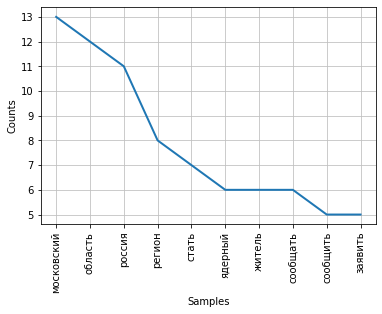

In [54]:
# Show the word frequency on a graph.

fdist.plot(10, cumulative=False);

In [55]:
# Convert the words back to text.

text_raw = " ".join(text)

# Pass the text to build a word cloud.

wordcloud = WordCloud(width=1600, height=800).generate(text_raw)

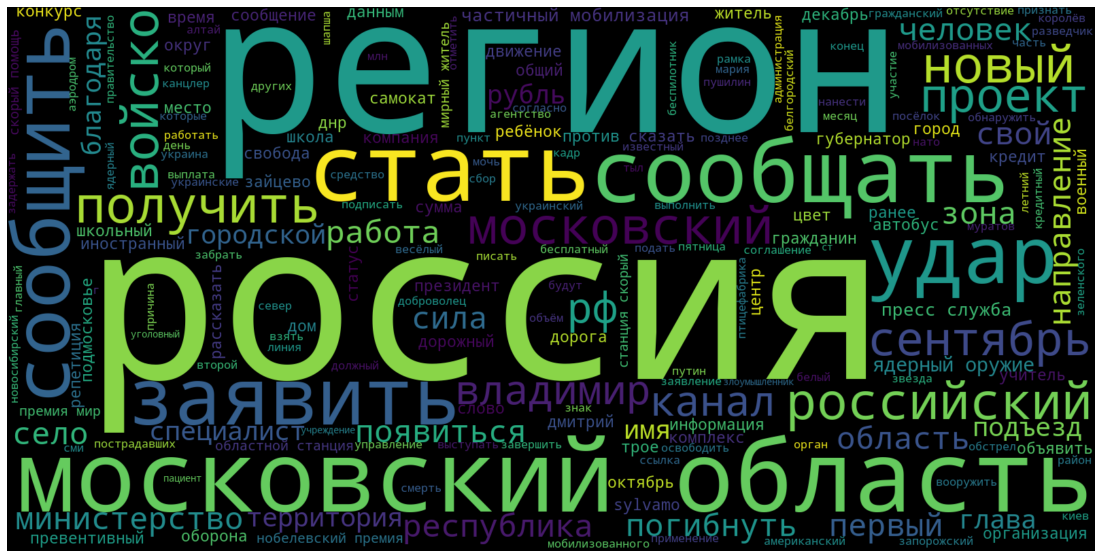

In [56]:
# Display the word cloud.

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
# Save the resulting cloud to a file.

wordcloud.to_file('results.png');

## Results

Web scraping tools can be used to collect news texts, and natural language processing tools can be used to find the main words from which the news are created.

On the main page of Zen, the news are constantly updated, and the project shows the state of the news here and now. With new iterations, the word cloud will change.

On October 7, 2022, 2 pm (Moscow time), the hot topics on Zen are: Moscow region, Russia, region, **nuclear**, citizen.


These tools can be applied to different sources and the results can be compared.